## 💰Predicting NBA Players' Salary using Linear Regression

## 1. Problem Definition

> How well can I predict the future salary of an NBA player, given their stats and their current contract?

## 2. Data

1. The players' stats dataset was downloaded from Kaggle: https://www.kaggle.com/lancharro5/seasons-stats-50-19 
2. The players' current salaries dataset was scraped from the website https://www.spotrac.com/nba/contracts/
3. The players' 2020 stats was scraped from https://www.basketball-reference.com/leagues/NBA_2020_per_game.html

## 3. Evaluation

I will use root mean squared log error (RMSLE). The goal is to get this value as low as possible

## 4. Features

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

In [2]:
# Import players' contracts
df1 = pd.read_html('https://www.spotrac.com/nba/contracts/', header=0)

In [3]:
df1[0].head(10)

,Player,Pos,Team,Age,Yrs,Dollars,Guaranteed,% GTD,Avg. Salary,Free Agent
0,Russell Westbrook (2018-2022),PG,HOUSigned w/OKC,31.0,5.0,"$206,794,070","$206,794,070",100.00%,"$41,358,814",2023.0
1,Stephen Curry (2017-2021),PG,GSW,32.0,5.0,"$201,158,790","$201,158,790",100.00%,"$40,231,758",2022.0
2,Damian Lillard (2021-2024),PG,POR,29.0,4.0,"$196,000,000","$196,000,000",100.00%,"$49,000,000",2025.0
3,Klay Thompson (2019-2023),SG,GSW,30.0,5.0,"$189,903,600","$189,903,600",100.00%,"$37,980,720",2024.0
4,Tobias Harris (2019-2023),SF,PHI,27.0,5.0,"$180,000,000","$180,000,000",100.00%,"$36,000,000",2024.0
5,Khris Middleton (2019-2023),SF,MIL,28.0,5.0,"$177,500,000","$177,500,000",100.00%,"$35,500,000",2024.0
6,Blake Griffin (2017-2021),PF,DETSigned w/LAC,31.0,5.0,"$171,174,820","$171,174,820",100.00%,"$34,234,964",2022.0
7,James Harden (2019-2022),SG,HOU,30.0,4.0,"$171,131,520","$171,131,520",100.00%,"$42,782,880",2023.0
8,John Wall (2019-2022),PG,WAS,29.0,4.0,"$171,131,520","$171,131,520",100.00%,"$42,782,880",2023.0
9,Jamal Murray (2020-2024),PG,DEN,23.0,5.0,"$169,650,000","$169,650,000",100.00%,"$33,930,000",2025.0


In [4]:
contracts = df1[0].copy()
contracts.head()

,Player,Pos,Team,Age,Yrs,Dollars,Guaranteed,% GTD,Avg. Salary,Free Agent
0,Russell Westbrook (2018-2022),PG,HOUSigned w/OKC,31.0,5.0,"$206,794,070","$206,794,070",100.00%,"$41,358,814",2023.0
1,Stephen Curry (2017-2021),PG,GSW,32.0,5.0,"$201,158,790","$201,158,790",100.00%,"$40,231,758",2022.0
2,Damian Lillard (2021-2024),PG,POR,29.0,4.0,"$196,000,000","$196,000,000",100.00%,"$49,000,000",2025.0
3,Klay Thompson (2019-2023),SG,GSW,30.0,5.0,"$189,903,600","$189,903,600",100.00%,"$37,980,720",2024.0
4,Tobias Harris (2019-2023),SF,PHI,27.0,5.0,"$180,000,000","$180,000,000",100.00%,"$36,000,000",2024.0


In [5]:
contracts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 10 columns):
Player         428 non-null object
Pos            426 non-null object
Team           426 non-null object
Age            426 non-null float64
Yrs            428 non-null float64
Dollars        428 non-null object
Guaranteed     426 non-null object
% GTD          426 non-null object
Avg. Salary    426 non-null object
Free Agent     426 non-null float64
dtypes: float64(3), object(7)
memory usage: 33.6+ KB


In [10]:
contracts.isna().sum()

Player         0
Pos            2
Team           2
Age            2
Yrs            0
Dollars        0
Guaranteed     2
% GTD          2
Avg. Salary    2
Free Agent     2
dtype: int64

In [11]:
# Drop null value columns to avoid errors
contracts.dropna(inplace=True)

#Split player columns
contracts = contracts.join(contracts['Player'].str.split(' ',n=1,expand=True))

# Checking on players with suffixes
contracts.loc[39:43]

,Player,Pos,Team,Age,Yrs,Dollars,Guaranteed,% GTD,Avg. Salary,Free Agent,0,1
39,C.J. McCollum (2017-2020),SG,POR,28.0,4.0,"$106,633,449","$106,633,449",100.00%,"$26,658,362",2021.0,C.J.,McCollum (2017-2020)
40,Otto Porter Jr. (2017-2020),SF,CHISigned w/WAS,27.0,4.0,"$106,524,975","$106,524,975",100.00%,"$26,631,244",2021.0,Otto,Porter Jr. (2017-2020)
41,Kawhi Leonard (2019-2021),SF,LAC,28.0,3.0,"$103,137,300","$103,137,300",100.00%,"$34,379,100",2022.0,Kawhi,Leonard (2019-2021)
42,Rudy Gobert (2017-2020),C,UTH,27.0,4.0,"$102,000,000","$94,000,000",92.16%,"$25,500,000",2021.0,Rudy,Gobert (2017-2020)
43,C.J. McCollum (2021-2023),SG,POR,28.0,3.0,"$100,000,000","$100,000,000",100.00%,"$33,333,333",2024.0,C.J.,McCollum (2021-2023)


In [12]:
# Drop old Player column
contracts.drop(columns = ['Player'], inplace=True)

#Rename columns
contracts.columns = ['Pos', 'Team', 'Age', 'Yrs', 'Dollars', 'Guaranteed', '% GTD', 'Avg. Salary', 'Free Agent',
                    'First Name', 'Last Name']

# Drop 'Blank'
#contracts.drop(columns = ['Blank'], inplace=True)

# Reorder columns
contracts = contracts[['First Name', 'Last Name', 'Pos', 'Team', 'Age', 'Yrs', 'Dollars', 
                       'Guaranteed', '% GTD', 'Avg. Salary', 'Free Agent']]

# display df1
contracts

,First Name,Last Name,Pos,Team,Age,Yrs,Dollars,Guaranteed,% GTD,Avg. Salary,Free Agent
0,Russell,Westbrook (2018-2022),PG,HOUSigned w/OKC,31.0,5.0,"$206,794,070","$206,794,070",100.00%,"$41,358,814",2023.0
1,Stephen,Curry (2017-2021),PG,GSW,32.0,5.0,"$201,158,790","$201,158,790",100.00%,"$40,231,758",2022.0
2,Damian,Lillard (2021-2024),PG,POR,29.0,4.0,"$196,000,000","$196,000,000",100.00%,"$49,000,000",2025.0
3,Klay,Thompson (2019-2023),SG,GSW,30.0,5.0,"$189,903,600","$189,903,600",100.00%,"$37,980,720",2024.0
4,Tobias,Harris (2019-2023),SF,PHI,27.0,5.0,"$180,000,000","$180,000,000",100.00%,"$36,000,000",2024.0
...,...,...,...,...,...,...,...,...,...,...,...
421,Deonte,Burton (2018-2019),SF,OKC,26.0,2.0,"$1,568,439","$1,568,439",100.00%,"$784,220",2021.0
422,Brad,Wanamaker (2019-2019),PG,BOS,30.0,1.0,"$1,445,697","$1,445,697",100.00%,"$1,445,697",2020.0
423,Theo,Pinson (2019-2019),SG,BKN,24.0,1.0,"$1,445,697","$1,445,697",100.00%,"$1,445,697",2021.0
424,Wenyen,Gabriel (2019-2019),PF,PORSigned w/SAC,23.0,1.0,"$1,445,697","$1,445,697",100.00%,"$1,445,697",2020.0


In [13]:
#Split value columns
contracts = contracts.join(contracts['Last Name'].str.split('.\(',n=1,expand=True))

# Drop old Player column
contracts.drop(columns = ['Last Name'], inplace=True)

#Rename columns
contracts.columns = ['First Name', 'Pos', 'Team', 'Age', 'Yrs', 'Dollars', 'Guaranteed', '% GTD', 'Avg. Salary', 'Free Agent',
                     'Last Name', 'Contract']

# Reorder columns
contracts = contracts[['First Name', 'Last Name', 'Pos', 'Team', 'Age', 'Yrs', 'Dollars', 
                       'Guaranteed', '% GTD', 'Avg. Salary', 'Free Agent', 'Contract']]
contracts

,First Name,Last Name,Pos,Team,Age,Yrs,Dollars,Guaranteed,% GTD,Avg. Salary,Free Agent,Contract
0,Russell,Westbrook,PG,HOUSigned w/OKC,31.0,5.0,"$206,794,070","$206,794,070",100.00%,"$41,358,814",2023.0,2018-2022)
1,Stephen,Curry,PG,GSW,32.0,5.0,"$201,158,790","$201,158,790",100.00%,"$40,231,758",2022.0,2017-2021)
2,Damian,Lillard,PG,POR,29.0,4.0,"$196,000,000","$196,000,000",100.00%,"$49,000,000",2025.0,2021-2024)
3,Klay,Thompson,SG,GSW,30.0,5.0,"$189,903,600","$189,903,600",100.00%,"$37,980,720",2024.0,2019-2023)
4,Tobias,Harris,SF,PHI,27.0,5.0,"$180,000,000","$180,000,000",100.00%,"$36,000,000",2024.0,2019-2023)
...,...,...,...,...,...,...,...,...,...,...,...,...
421,Deonte,Burton,SF,OKC,26.0,2.0,"$1,568,439","$1,568,439",100.00%,"$784,220",2021.0,2018-2019)
422,Brad,Wanamaker,PG,BOS,30.0,1.0,"$1,445,697","$1,445,697",100.00%,"$1,445,697",2020.0,2019-2019)
423,Theo,Pinson,SG,BKN,24.0,1.0,"$1,445,697","$1,445,697",100.00%,"$1,445,697",2021.0,2019-2019)
424,Wenyen,Gabriel,PF,PORSigned w/SAC,23.0,1.0,"$1,445,697","$1,445,697",100.00%,"$1,445,697",2020.0,2019-2019)


In [14]:
contracts.iloc[40]

First Name                Otto
Last Name           Porter Jr.
Pos                         SF
Team           CHISigned w/WAS
Age                         27
Yrs                          4
Dollars           $106,524,975
Guaranteed        $106,524,975
% GTD                  100.00%
Avg. Salary        $26,631,244
Free Agent                2021
Contract            2017-2020)
Name: 40, dtype: object

In [15]:
#Concatenate First Name and Last Name columns
contracts['Player'] = contracts['First Name'] + ' ' + contracts['Last Name']

# Drop 'First Name' and 'Last Name'
contracts.drop(columns = ['First Name', 'Last Name'], inplace=True)

# Reorder columns
contracts = contracts[['Player', 'Contract', 'Pos', 'Team', 'Age', 'Yrs', 'Dollars', 
                       'Guaranteed', '% GTD', 'Avg. Salary', 'Free Agent']]

contracts

,Player,Contract,Pos,Team,Age,Yrs,Dollars,Guaranteed,% GTD,Avg. Salary,Free Agent
0,Russell Westbrook,2018-2022),PG,HOUSigned w/OKC,31.0,5.0,"$206,794,070","$206,794,070",100.00%,"$41,358,814",2023.0
1,Stephen Curry,2017-2021),PG,GSW,32.0,5.0,"$201,158,790","$201,158,790",100.00%,"$40,231,758",2022.0
2,Damian Lillard,2021-2024),PG,POR,29.0,4.0,"$196,000,000","$196,000,000",100.00%,"$49,000,000",2025.0
3,Klay Thompson,2019-2023),SG,GSW,30.0,5.0,"$189,903,600","$189,903,600",100.00%,"$37,980,720",2024.0
4,Tobias Harris,2019-2023),SF,PHI,27.0,5.0,"$180,000,000","$180,000,000",100.00%,"$36,000,000",2024.0
...,...,...,...,...,...,...,...,...,...,...,...
421,Deonte Burton,2018-2019),SF,OKC,26.0,2.0,"$1,568,439","$1,568,439",100.00%,"$784,220",2021.0
422,Brad Wanamaker,2019-2019),PG,BOS,30.0,1.0,"$1,445,697","$1,445,697",100.00%,"$1,445,697",2020.0
423,Theo Pinson,2019-2019),SG,BKN,24.0,1.0,"$1,445,697","$1,445,697",100.00%,"$1,445,697",2021.0
424,Wenyen Gabriel,2019-2019),PF,PORSigned w/SAC,23.0,1.0,"$1,445,697","$1,445,697",100.00%,"$1,445,697",2020.0


In [16]:
# Split year signed column
contracts = contracts.join(contracts['Contract'].str.split('-', expand=True))

# Drop old Year Signed column
contracts.drop(columns = ['Contract'], inplace=True)

#Rename columns
contracts.columns = ['Player', 'Pos', 'Team', 'Age', 'Yrs', 'Dollars', 
                     'Guaranteed', '% GTD', 'Avg. Salary', 'Free Agent', 'Year', 'Contract Ends']


contracts

,Player,Pos,Team,Age,Yrs,Dollars,Guaranteed,% GTD,Avg. Salary,Free Agent,Year,Contract Ends
0,Russell Westbrook,PG,HOUSigned w/OKC,31.0,5.0,"$206,794,070","$206,794,070",100.00%,"$41,358,814",2023.0,2018,2022)
1,Stephen Curry,PG,GSW,32.0,5.0,"$201,158,790","$201,158,790",100.00%,"$40,231,758",2022.0,2017,2021)
2,Damian Lillard,PG,POR,29.0,4.0,"$196,000,000","$196,000,000",100.00%,"$49,000,000",2025.0,2021,2024)
3,Klay Thompson,SG,GSW,30.0,5.0,"$189,903,600","$189,903,600",100.00%,"$37,980,720",2024.0,2019,2023)
4,Tobias Harris,SF,PHI,27.0,5.0,"$180,000,000","$180,000,000",100.00%,"$36,000,000",2024.0,2019,2023)
...,...,...,...,...,...,...,...,...,...,...,...,...
421,Deonte Burton,SF,OKC,26.0,2.0,"$1,568,439","$1,568,439",100.00%,"$784,220",2021.0,2018,2019)
422,Brad Wanamaker,PG,BOS,30.0,1.0,"$1,445,697","$1,445,697",100.00%,"$1,445,697",2020.0,2019,2019)
423,Theo Pinson,SG,BKN,24.0,1.0,"$1,445,697","$1,445,697",100.00%,"$1,445,697",2021.0,2019,2019)
424,Wenyen Gabriel,PF,PORSigned w/SAC,23.0,1.0,"$1,445,697","$1,445,697",100.00%,"$1,445,697",2020.0,2019,2019)


In [17]:
# Remove parentheses
contracts = contracts.replace(to_replace='\(', value='', regex=True)
contracts = contracts.replace(to_replace='\)', value='', regex=True)
contracts = contracts.replace(to_replace='\$', value='', regex=True)
contracts = contracts.replace(to_replace='\%', value='', regex=True)
contracts = contracts.replace(to_replace='\,', value='', regex=True)

#contracts = contracts.apply(lambda x: re.sub(r"\(,$%\)", "", x))

contracts

,Player,Pos,Team,Age,Yrs,Dollars,Guaranteed,% GTD,Avg. Salary,Free Agent,Year,Contract Ends
0,Russell Westbrook,PG,HOUSigned w/OKC,31.0,5.0,206794070,206794070,100.00,41358814,2023.0,2018,2022
1,Stephen Curry,PG,GSW,32.0,5.0,201158790,201158790,100.00,40231758,2022.0,2017,2021
2,Damian Lillard,PG,POR,29.0,4.0,196000000,196000000,100.00,49000000,2025.0,2021,2024
3,Klay Thompson,SG,GSW,30.0,5.0,189903600,189903600,100.00,37980720,2024.0,2019,2023
4,Tobias Harris,SF,PHI,27.0,5.0,180000000,180000000,100.00,36000000,2024.0,2019,2023
...,...,...,...,...,...,...,...,...,...,...,...,...
421,Deonte Burton,SF,OKC,26.0,2.0,1568439,1568439,100.00,784220,2021.0,2018,2019
422,Brad Wanamaker,PG,BOS,30.0,1.0,1445697,1445697,100.00,1445697,2020.0,2019,2019
423,Theo Pinson,SG,BKN,24.0,1.0,1445697,1445697,100.00,1445697,2021.0,2019,2019
424,Wenyen Gabriel,PF,PORSigned w/SAC,23.0,1.0,1445697,1445697,100.00,1445697,2020.0,2019,2019


In [18]:
contracts['Player'].nunique()

405

In [19]:
# Players who had accent in names
contracts.loc[contracts['Player'].str.match('Dennis Schröder'), 'Player'] = 'Dennis Schroder'
contracts.loc[contracts['Player'].str.match('Élie Okobo'), 'Player'] = 'Elie Okobo' 

In [20]:
# Find the earlist contract sign so I can filter stats one year ahead of earlist signed contract
contracts['Year'].min()

'2015'

In [21]:
contracts = contracts.replace(['G'], ['SG'])

In [22]:
contracts[contracts['Pos'].str.match('G')]

,Player,Pos,Team,Age,Yrs,Dollars,Guaranteed,% GTD,Avg. Salary,Free Agent,Year,Contract Ends


In [23]:
# import players stats
df = pd.read_csv('Seasons_stats_complete.csv', low_memory=False, encoding= 'unicode_escape')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26063 entries, 0 to 26062
Data columns (total 50 columns):
Unnamed: 0    26063 non-null int64
Year          26063 non-null int64
Player        26063 non-null object
Pos           26063 non-null object
Age           26063 non-null int64
Tm            26063 non-null object
G             26063 non-null int64
MP            26063 non-null int64
PER           26063 non-null float64
TS%           26063 non-null float64
3PAr          26063 non-null float64
FTr           26063 non-null float64
ORB%          26063 non-null float64
DRB%          26063 non-null float64
TRB%          26063 non-null float64
AST%          26063 non-null float64
STL%          26063 non-null float64
BLK%          26063 non-null float64
TOV%          26063 non-null float64
USG%          26063 non-null float64
OWS           26063 non-null float64
DWS           26063 non-null float64
WS            26063 non-null float64
WS/48         26063 non-null float64
OBPM          26

In [25]:
df.isna().sum()

Unnamed: 0    0
Year          0
Player        0
Pos           0
Age           0
Tm            0
G             0
MP            0
PER           0
TS%           0
3PAr          0
FTr           0
ORB%          0
DRB%          0
TRB%          0
AST%          0
STL%          0
BLK%          0
TOV%          0
USG%          0
OWS           0
DWS           0
WS            0
WS/48         0
OBPM          0
DBPM          0
BPM           0
VORP          0
FG            0
FGA           0
FG%           0
3P            0
3PA           0
3P%           0
2P            0
2PA           0
2P%           0
eFG%          0
FT            0
FTA           0
FT%           0
ORB           0
DRB           0
TRB           0
AST           0
STL           0
BLK           0
TOV           0
PF            0
PTS           0
dtype: int64

In [26]:
df.columns

Index(['Unnamed: 0', 'Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'MP', 'PER',
       'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%',
       'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM',
       'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%',
       'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK',
       'TOV', 'PF', 'PTS'],
      dtype='object')

In [27]:
df.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950,Curly Armstrong,G-F,31,FTW,63,0,0.0,0.368,...,0.705,0,0,0,176,0,0,0,217,458
1,1,1950,Cliff Barker,SG,29,INO,49,0,0.0,0.435,...,0.708,0,0,0,109,0,0,0,99,279
2,2,1950,Leo Barnhorst,SF,25,CHS,67,0,0.0,0.394,...,0.698,0,0,0,140,0,0,0,192,438
3,3,1950,Ed Bartels,F,24,TOT,15,0,0.0,0.312,...,0.559,0,0,0,20,0,0,0,29,63
4,4,1950,Ed Bartels,F,24,DNN,13,0,0.0,0.308,...,0.548,0,0,0,20,0,0,0,27,59


In [28]:
df_filtered = df.query('Year > 2013')

In [29]:
# Copy dataframe, drop columns, and rename columns for easy readability
stats = df_filtered.copy()
stats = stats.drop(['Unnamed: 0'], axis=1)
stats.rename(columns={'Tm': 'Team'}, inplace=True)

# Mapping numeric values onto positions
#mapping = {'PG': 1, 'SG': 2, 'SF': 3, 'PF': 4, 'C': 5}
#stats['Pos'] = stats['Pos'].map(mapping)

# Show stats per-game rather that total to eliminate the affect of games played
stats['MPG']=stats['MP']/stats['G']
stats['ORPG']=stats['ORB']/stats['G']
stats['DRPG']=stats['DRB']/stats['G']
stats['FGPG']=stats['FG']/stats['G']
stats['FGAPG']=stats['FGA']/stats['G']
stats['3PPG']=stats['3P']/stats['G']
stats['3PAPG']=stats['3PA']/stats['G']
stats['2PPG']=stats['2P']/stats['G']
stats['2PAPG']=stats['2PA']/stats['G']
stats['FTPG']=stats['FT']/stats['G']
stats['FTAPG']=stats['FTA']/stats['G']
stats['TRBPG']=stats['TRB']/stats['G']
stats['APG']=stats['AST']/stats['G']
stats['SPG']=stats['STL']/stats['G']
stats['BPG']=stats['BLK']/stats['G']
stats['TOPG']=stats['TOV']/stats['G']
stats['PFPG']=stats['PF']/stats['G']
stats['PPG']=stats['PTS']/stats['G']

# Drop Total Columns
stats.drop(['MP', 'ORB', 'DRB', 'FG', 'FGA', '3P', '3PA', '2P', '2PA', 'FT', 'FTA', 'TRB', 'AST', 'STL', 'BLK',
           'TOV', 'PF', 'PTS'], axis=1, inplace=True)

In [30]:
stats.head().T

,22253,22254,22255,22256,22257
Year,2014,2014,2014,2014,2014
Player,Quincy Acy,Quincy Acy,Quincy Acy,Steven Adams,Jeff Adrien
Pos,SF,SF,SF,C,PF
Age,23,23,23,20,27
Team,TOT,TOR,SAC,OKC,TOT
G,63,7,56,81,53
PER,10.1,17.2,9.6,11.2,17.4
TS%,0.52,0.542,0.518,0.541,0.553
3PAr,0.106,0.357,0.079,0,0
FTr,0.376,0.571,0.354,0.735,0.433


In [31]:
stats.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,3807.0,2016.571053,1.736484,2014.000000,2015.000000,2017.000000,2018.000000,2019.000000
Age,3807.0,26.410559,4.172115,19.000000,23.000000,26.000000,29.000000,42.000000
G,3807.0,45.924875,26.541654,1.000000,22.000000,50.000000,72.000000,83.000000
PER,3807.0,12.689204,7.104173,-41.700000,9.500000,12.600000,15.900000,133.800000
TS%,3807.0,0.517422,0.114560,0.000000,0.488000,0.531000,0.569000,1.500000
3PAr,3807.0,0.313434,0.223717,0.000000,0.117500,0.325000,0.466000,1.000000
FTr,3807.0,0.266334,0.241741,0.000000,0.154000,0.232000,0.333000,6.000000
ORB%,3807.0,5.001576,5.162340,0.000000,1.800000,3.400000,7.300000,100.000000
DRB%,3807.0,14.789519,7.404579,0.000000,9.900000,13.500000,18.800000,100.000000
TRB%,3807.0,9.897846,5.382679,0.000000,6.100000,8.600000,13.000000,62.800000


In [32]:
len(stats)

3807

In [33]:
#Want new_stats to match rookies stats columns
new_stats = stats[['Year', 'Player', 'Pos', 'Age', 'G', 'FG%', '3P%', '2P%', 'eFG%', 'FT%', 'MPG', 'ORPG', 'DRPG', 'FGPG', 'FGAPG', '3PPG',
                  '3PAPG', '2PPG', '2PAPG', 'FTPG', 'FTAPG', 'TRBPG', 'APG', 'SPG', 'BPG', 'TOPG', 'PFPG', 'PPG', 'PER']]

#Rename columns
new_stats.columns = ['Year', 'Player', 'Pos', 'Age', 'G', 'FG%', '3P%', '2P%', 'eFG%', 'FT%', 'MP', 'ORB', 'DRB', 'FG', 'FGA', '3P',
                  '3PA', '2P', '2PA', 'FT', 'FTA', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PER']

# Reorder
new_stats = new_stats[['Player', 'Pos', 'Age', 'G', 'FG%', '3P%', '2P%', 'eFG%', 'FT%', 'MP', 'ORB', 'DRB', 'FG', 'FGA', '3P',
                  '3PA', '2P', '2PA', 'FT', 'FTA', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PER', 'Year']]

new_stats

,Player,Pos,Age,G,FG%,3P%,2P%,eFG%,FT%,MP,...,FTA,TRB,AST,STL,BLK,TOV,PF,PTS,PER,Year
22253,Quincy Acy,SF,23,63,0.468,0.267,0.492,0.482,0.660,13.444444,...,0.841270,3.428571,0.444444,0.365079,0.412698,0.476190,1.936508,2.714286,10.1,2014
22254,Quincy Acy,SF,23,7,0.429,0.400,0.444,0.500,0.625,8.714286,...,1.142857,2.142857,0.571429,0.571429,0.428571,0.285714,1.142857,2.714286,17.2,2014
22255,Quincy Acy,SF,23,56,0.472,0.200,0.496,0.480,0.667,14.035714,...,0.803571,3.589286,0.428571,0.339286,0.410714,0.500000,2.035714,2.714286,9.6,2014
22256,Steven Adams,C,20,81,0.503,0.000,0.503,0.503,0.581,14.777778,...,1.679012,4.098765,0.530864,0.493827,0.703704,0.876543,2.506173,3.271605,11.2,2014
22257,Jeff Adrien,PF,27,53,0.520,0.000,0.520,0.520,0.639,18.132075,...,2.245283,5.773585,0.716981,0.452830,0.679245,0.735849,2.037736,6.830189,17.4,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26058,Tyler Zeller,C,29,4,0.571,0.000,0.571,0.571,0.778,20.500000,...,4.500000,4.500000,0.750000,0.250000,0.750000,1.000000,4.000000,11.500000,19.4,2019
26059,Ante Zizic,C,22,59,0.553,0.000,0.553,0.553,0.705,18.338983,...,2.237288,5.423729,0.898305,0.220339,0.372881,1.033898,1.915254,7.779661,16.2,2019
26060,Ivica Zubac,C,21,59,0.559,0.000,0.559,0.559,0.802,17.627119,...,2.135593,6.135593,1.067797,0.237288,0.864407,1.186441,2.322034,8.898305,18.9,2019
26061,Ivica Zubac,C,21,33,0.580,0.000,0.580,0.580,0.864,15.636364,...,2.000000,4.909091,0.757576,0.121212,0.818182,1.000000,2.212121,8.515152,19.5,2019


In [34]:
# NBA 2019-2020 season
df3 = pd.read_excel('NBA2020Stats.xlsx')

In [35]:
df3.tail()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PER
619,510,Thaddeus Young\youngth01,PF,31,CHI,64,16,24.9,4.2,9.4,...,1.5,3.5,4.9,1.8,1.4,0.4,1.6,2.1,10.3,13.3
620,511,Trae Young\youngtr01,PG,21,ATL,60,60,35.3,9.1,20.8,...,0.5,3.7,4.3,9.3,1.1,0.1,4.8,1.7,29.6,23.9
621,512,Cody Zeller\zelleco01,C,27,CHO,58,39,23.1,4.3,8.3,...,2.8,4.3,7.1,1.5,0.7,0.4,1.3,2.4,11.1,18.8
622,513,Ante Zizic\zizican01,C,23,CLE,22,0,10.0,1.9,3.3,...,0.8,2.2,3.0,0.3,0.3,0.2,0.5,1.2,4.4,16.4
623,514,Ivica Zubac\zubaciv01,C,22,LAC,64,62,18.1,3.2,5.3,...,2.6,4.6,7.2,1.1,0.2,0.9,0.8,2.3,8.0,21.0


In [36]:
df3.isna().sum()

Rk         0
Player     0
Pos        0
Age        0
Tm         0
G          0
GS         0
MP         0
FG         0
FGA        0
FG%        5
3P         0
3PA        0
3P%       35
2P         0
2PA        0
2P%       12
eFG%       5
FT         0
FTA        0
FT%       40
ORB        0
DRB        0
TRB        0
AST        0
STL        0
BLK        0
TOV        0
PF         0
PTS        0
PER        0
dtype: int64

In [37]:
twenty_stats = df3.copy()

In [38]:
twenty_stats.columns

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PER'],
      dtype='object')

In [39]:
# Split Player column
twenty_stats['NewPlayer'] = twenty_stats['Player'].str.split('\\').str[0]

# Drop old Player column
twenty_stats.drop(columns = ['Player', 'Rk'], inplace=True)

#Rename columns
twenty_stats.columns = ['Pos', 'Age', 'Team', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PER', 'Player']

#Reorder columns
twenty_stats = twenty_stats[['Player', 'Pos', 'Age', 'Team', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PER']]

# Create Year column
twenty_stats['Year'] = 2020

twenty_stats

,Player,Pos,Age,Team,G,GS,MP,FG,FGA,FG%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PER,Year
0,Steven Adams,C,26,OKC,58,58,27.0,4.5,7.6,0.591,...,6.0,9.4,2.4,0.9,1.1,1.5,1.9,10.9,20.8,2020
1,Bam Adebayo,PF,22,MIA,65,65,34.4,6.3,11.1,0.567,...,8.0,10.5,5.1,1.2,1.3,2.8,2.5,16.2,20.6,2020
2,LaMarcus Aldridge,C,34,SAS,53,53,33.1,7.4,15.0,0.493,...,5.5,7.4,2.4,0.7,1.6,1.4,2.4,18.9,19.8,2020
3,Nickeil Alexander-Walker,SG,21,NOP,41,0,12.2,1.9,5.5,0.339,...,1.8,2.0,1.8,0.3,0.2,1.0,1.1,5.1,7.6,2020
4,Grayson Allen,SG,24,MEM,30,0,16.6,2.6,5.9,0.449,...,2.0,2.2,1.4,0.2,0.0,0.8,1.2,7.4,11.4,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,Thaddeus Young,PF,31,CHI,64,16,24.9,4.2,9.4,0.448,...,3.5,4.9,1.8,1.4,0.4,1.6,2.1,10.3,13.3,2020
620,Trae Young,PG,21,ATL,60,60,35.3,9.1,20.8,0.437,...,3.7,4.3,9.3,1.1,0.1,4.8,1.7,29.6,23.9,2020
621,Cody Zeller,C,27,CHO,58,39,23.1,4.3,8.3,0.524,...,4.3,7.1,1.5,0.7,0.4,1.3,2.4,11.1,18.8,2020
622,Ante Zizic,C,23,CLE,22,0,10.0,1.9,3.3,0.569,...,2.2,3.0,0.3,0.3,0.2,0.5,1.2,4.4,16.4,2020


In [40]:
# Replace empty columns with most frequent 
for column in twenty_stats.columns:
    twenty_stats[column].fillna(twenty_stats[column].mode()[0], inplace=True)

In [41]:
twenty_stats.isna().sum()

Player    0
Pos       0
Age       0
Team      0
G         0
GS        0
MP        0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
2P        0
2PA       0
2P%       0
eFG%      0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
PER       0
Year      0
dtype: int64

In [42]:
df_stats = pd.concat([new_stats, twenty_stats], ignore_index=True, sort=False)

df_stats

,Player,Pos,Age,G,FG%,3P%,2P%,eFG%,FT%,MP,...,AST,STL,BLK,TOV,PF,PTS,PER,Year,Team,GS
0,Quincy Acy,SF,23,63,0.468,0.267,0.492,0.482,0.660,13.444444,...,0.444444,0.365079,0.412698,0.476190,1.936508,2.714286,10.1,2014,NaN,NaN
1,Quincy Acy,SF,23,7,0.429,0.400,0.444,0.500,0.625,8.714286,...,0.571429,0.571429,0.428571,0.285714,1.142857,2.714286,17.2,2014,NaN,NaN
2,Quincy Acy,SF,23,56,0.472,0.200,0.496,0.480,0.667,14.035714,...,0.428571,0.339286,0.410714,0.500000,2.035714,2.714286,9.6,2014,NaN,NaN
3,Steven Adams,C,20,81,0.503,0.000,0.503,0.503,0.581,14.777778,...,0.530864,0.493827,0.703704,0.876543,2.506173,3.271605,11.2,2014,NaN,NaN
4,Jeff Adrien,PF,27,53,0.520,0.000,0.520,0.520,0.639,18.132075,...,0.716981,0.452830,0.679245,0.735849,2.037736,6.830189,17.4,2014,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,Thaddeus Young,PF,31,64,0.448,0.356,0.501,0.513,0.583,24.900000,...,1.800000,1.400000,0.400000,1.600000,2.100000,10.300000,13.3,2020,CHI,16.0
4427,Trae Young,PG,21,60,0.437,0.361,0.501,0.519,0.860,35.300000,...,9.300000,1.100000,0.100000,4.800000,1.700000,29.600000,23.9,2020,ATL,60.0
4428,Cody Zeller,C,27,58,0.524,0.240,0.577,0.543,0.682,23.100000,...,1.500000,0.700000,0.400000,1.300000,2.400000,11.100000,18.8,2020,CHO,39.0
4429,Ante Zizic,C,23,22,0.569,0.000,0.569,0.569,0.737,10.000000,...,0.300000,0.300000,0.200000,0.500000,1.200000,4.400000,16.4,2020,CLE,0.0


In [43]:
df_stats.Year.isna().sum()

0

In [44]:
df_stats[df_stats['Player'].str.match('Ja Morant')]

,Player,Pos,Age,G,FG%,3P%,2P%,eFG%,FT%,MP,...,AST,STL,BLK,TOV,PF,PTS,PER,Year,Team,GS
4223,Ja Morant,PG,20,59,0.491,0.367,0.517,0.523,0.77,30.0,...,6.9,0.9,0.3,3.2,1.5,17.6,18.0,2020,MEM,59.0


In [45]:
contracts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426 entries, 0 to 425
Data columns (total 12 columns):
Player           426 non-null object
Pos              426 non-null object
Team             426 non-null object
Age              426 non-null float64
Yrs              426 non-null float64
Dollars          426 non-null object
Guaranteed       426 non-null object
% GTD            426 non-null object
Avg. Salary      426 non-null object
Free Agent       426 non-null float64
Year             426 non-null object
Contract Ends    426 non-null object
dtypes: float64(3), object(9)
memory usage: 63.3+ KB


In [46]:
#Make Year column numeric
contracts['Year'] = pd.to_numeric(contracts['Year'])

In [47]:
# Increase Year column value my one to match the stats season. 
# i.e. 2017-18 season is labeled 2018 in stats but 2017 in contracts 
contracts['Year'] += 1

In [48]:
contracts.nunique()

Player           405
Pos                5
Team             111
Age               22
Yrs                5
Dollars          311
Guaranteed       314
% GTD             72
Avg. Salary      304
Free Agent         7
Year               7
Contract Ends      6
dtype: int64

In [49]:
contracts.loc[40:43]

,Player,Pos,Team,Age,Yrs,Dollars,Guaranteed,% GTD,Avg. Salary,Free Agent,Year,Contract Ends
40,Otto Porter Jr.,SF,CHISigned w/WAS,27.0,4.0,106524975,106524975,100.00,26631244,2021.0,2018,2020
41,Kawhi Leonard,SF,LAC,28.0,3.0,103137300,103137300,100.00,34379100,2022.0,2020,2021
42,Rudy Gobert,C,UTH,27.0,4.0,102000000,94000000,92.16,25500000,2021.0,2018,2020
43,C.J. McCollum,SG,POR,28.0,3.0,100000000,100000000,100.00,33333333,2024.0,2022,2023


In [50]:
#Merge df_stats and contracts
df_final = pd.merge(contracts, df_stats, on=['Player', 'Year'], how='left')

df_final

,Player,Pos_x,Team_x,Age_x,Yrs,Dollars,Guaranteed,% GTD,Avg. Salary,Free Agent,...,TRB,AST,STL,BLK,TOV,PF,PTS,PER,Team_y,GS
0,Russell Westbrook,PG,HOUSigned w/OKC,31.0,5.0,206794070,206794070,100.00,41358814,2023.0,...,11.054795,10.739726,1.945205,0.452055,4.452055,3.356164,22.945205,21.1,NaN,NaN
1,Stephen Curry,PG,GSW,32.0,5.0,201158790,201158790,100.00,40231758,2022.0,...,5.117647,6.078431,1.568627,0.156863,3.000000,2.235294,26.392157,28.2,NaN,NaN
2,Damian Lillard,PG,POR,29.0,4.0,196000000,196000000,100.00,49000000,2025.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Klay Thompson,SG,GSW,30.0,5.0,189903600,189903600,100.00,37980720,2024.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Tobias Harris,SF,PHI,27.0,5.0,180000000,180000000,100.00,36000000,2024.0,...,6.800000,3.200000,0.800000,0.500000,1.500000,2.300000,19.400000,16.8,PHI,65.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,Theo Pinson,SG,BKN,24.0,1.0,1445697,1445697,100.00,1445697,2021.0,...,1.600000,1.700000,0.500000,0.100000,1.000000,1.100000,3.600000,5.2,BRK,0.0
456,Wenyen Gabriel,PF,PORSigned w/SAC,23.0,1.0,1445697,1445697,100.00,1445697,2020.0,...,1.600000,0.300000,0.400000,0.200000,0.600000,1.300000,2.100000,9.6,TOT,1.0
457,Wenyen Gabriel,PF,PORSigned w/SAC,23.0,1.0,1445697,1445697,100.00,1445697,2020.0,...,0.900000,0.300000,0.300000,0.200000,0.500000,0.600000,1.700000,7.5,SAC,0.0
458,Wenyen Gabriel,PF,PORSigned w/SAC,23.0,1.0,1445697,1445697,100.00,1445697,2020.0,...,2.100000,0.300000,0.400000,0.200000,0.600000,1.600000,2.400000,10.5,POR,1.0


In [51]:
df_stats[df_stats['Player'] =='Damian Lillard']

,Player,Pos,Age,G,FG%,3P%,2P%,eFG%,FT%,MP,...,AST,STL,BLK,TOV,PF,PTS,PER,Year,Team,GS
348,Damian Lillard,PG,23,82,0.424,0.394,0.447,0.508,0.871,35.817073,...,5.573171,0.780488,0.268293,2.353659,2.402439,20.670732,18.6,2014,NaN,NaN
961,Damian Lillard,PG,24,82,0.434,0.343,0.500,0.506,0.864,35.670732,...,6.182927,1.182927,0.256098,2.707317,2.000000,20.975610,20.7,2015,NaN,NaN
1587,Damian Lillard,PG,25,75,0.419,0.375,0.450,0.497,0.892,35.680000,...,6.826667,0.866667,0.373333,3.226667,2.200000,25.053333,22.2,2016,NaN,NaN
2165,Damian Lillard,PG,26,75,0.444,0.370,0.491,0.516,0.895,35.920000,...,5.853333,0.906667,0.266667,2.626667,2.026667,26.986667,24.1,2017,NaN,NaN
2804,Damian Lillard,PG,27,73,0.439,0.361,0.501,0.519,0.916,36.575342,...,6.589041,1.054795,0.369863,2.821918,1.602740,26.876712,25.2,2018,NaN,NaN
3500,Damian Lillard,PG,28,80,0.444,0.369,0.499,0.522,0.912,35.475000,...,6.887500,1.100000,0.425000,2.650000,1.850000,25.837500,23.7,2019,NaN,NaN
4169,Damian Lillard,PG,29,58,0.457,0.394,0.518,0.554,0.888,36.900000,...,7.800000,1.000000,0.400000,2.900000,1.700000,28.900000,26.2,2020,POR,58.0


In [52]:
contracts[contracts['Player'] =='Damian Lillard']

,Player,Pos,Team,Age,Yrs,Dollars,Guaranteed,% GTD,Avg. Salary,Free Agent,Year,Contract Ends
2,Damian Lillard,PG,POR,29.0,4.0,196000000,196000000,100.00,49000000,2025.0,2022,2024
23,Damian Lillard,PG,POR,29.0,5.0,139888445,139888445,100.00,27977689,0.0,2017,2020


In [53]:
df_final[df_final['Player'] =='Damian Lillard']

,Player,Pos_x,Team_x,Age_x,Yrs,Dollars,Guaranteed,% GTD,Avg. Salary,Free Agent,...,TRB,AST,STL,BLK,TOV,PF,PTS,PER,Team_y,GS
2,Damian Lillard,PG,POR,29.0,4.0,196000000,196000000,100.00,49000000,2025.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,Damian Lillard,PG,POR,29.0,5.0,139888445,139888445,100.00,27977689,0.0,...,4.906667,5.853333,0.906667,0.266667,2.626667,2.026667,26.986667,24.1,NaN,NaN


In [54]:
df_final[df_final['Year'] == 2021]

,Player,Pos_x,Team_x,Age_x,Yrs,Dollars,Guaranteed,% GTD,Avg. Salary,Free Agent,...,TRB,AST,STL,BLK,TOV,PF,PTS,PER,Team_y,GS
11,Jamal Murray,PG,DEN,23.0,5.0,169650000,169650000,100.00,33930000,2025.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,Ben Simmons,PG,PHI,23.0,5.0,169650000,169650000,100.00,33930000,2025.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,Pascal Siakam,PF,TOR,26.0,4.0,129920000,129920000,100.00,32480000,2024.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,Jaylen Brown,SG,BOS,23.0,4.0,107000000,103000000,96.26,26750000,2024.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,Draymond Green,PF,GSW,30.0,4.0,99666362,99666362,100.00,24916591,2024.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54,Buddy Hield,SG,SAC,27.0,4.0,94000000,86000000,91.49,23500000,2024.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,Eric Gordon,SG,HOU,31.0,4.0,75574356,54656454,72.32,18893589,2024.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,Domantas Sabonis,C,IND,24.0,4.0,74900000,74900000,100.00,18725000,2024.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,Dejounte Murray,PG,SAS,23.0,4.0,63820000,63820000,100.00,15955000,2024.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,Caris LeVert,SG,BKN,25.0,3.0,52500000,52500000,100.00,17500000,2023.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
indexNames = df_final[df_final['Year'] > 2020].index
df_final.drop(indexNames, inplace=True)

In [56]:
df_final[df_final['Player'].str.match('Otto Porter Jr.')]

,Player,Pos_x,Team_x,Age_x,Yrs,Dollars,Guaranteed,% GTD,Avg. Salary,Free Agent,...,TRB,AST,STL,BLK,TOV,PF,PTS,PER,Team_y,GS
44,Otto Porter Jr.,SF,CHISigned w/WAS,27.0,4.0,106524975,106524975,100.00,26631244,2021.0,...,6.38961,2.038961,1.506494,0.532468,0.974026,1.961039,14.727273,18.3,NaN,NaN


In [57]:
df_final

,Player,Pos_x,Team_x,Age_x,Yrs,Dollars,Guaranteed,% GTD,Avg. Salary,Free Agent,...,TRB,AST,STL,BLK,TOV,PF,PTS,PER,Team_y,GS
0,Russell Westbrook,PG,HOUSigned w/OKC,31.0,5.0,206794070,206794070,100.00,41358814,2023.0,...,11.054795,10.739726,1.945205,0.452055,4.452055,3.356164,22.945205,21.1,NaN,NaN
1,Stephen Curry,PG,GSW,32.0,5.0,201158790,201158790,100.00,40231758,2022.0,...,5.117647,6.078431,1.568627,0.156863,3.000000,2.235294,26.392157,28.2,NaN,NaN
3,Klay Thompson,SG,GSW,30.0,5.0,189903600,189903600,100.00,37980720,2024.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Tobias Harris,SF,PHI,27.0,5.0,180000000,180000000,100.00,36000000,2024.0,...,6.800000,3.200000,0.800000,0.500000,1.500000,2.300000,19.400000,16.8,PHI,65.0
5,Khris Middleton,SF,MIL,28.0,5.0,177500000,177500000,100.00,35500000,2024.0,...,6.200000,4.100000,0.900000,0.100000,2.100000,2.200000,21.100000,21.4,MIL,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,Theo Pinson,SG,BKN,24.0,1.0,1445697,1445697,100.00,1445697,2021.0,...,1.600000,1.700000,0.500000,0.100000,1.000000,1.100000,3.600000,5.2,BRK,0.0
456,Wenyen Gabriel,PF,PORSigned w/SAC,23.0,1.0,1445697,1445697,100.00,1445697,2020.0,...,1.600000,0.300000,0.400000,0.200000,0.600000,1.300000,2.100000,9.6,TOT,1.0
457,Wenyen Gabriel,PF,PORSigned w/SAC,23.0,1.0,1445697,1445697,100.00,1445697,2020.0,...,0.900000,0.300000,0.300000,0.200000,0.500000,0.600000,1.700000,7.5,SAC,0.0
458,Wenyen Gabriel,PF,PORSigned w/SAC,23.0,1.0,1445697,1445697,100.00,1445697,2020.0,...,2.100000,0.300000,0.400000,0.200000,0.600000,1.600000,2.400000,10.5,POR,1.0


In [58]:
df_final.nunique()

Player           405
Pos_x              5
Team_x           110
Age_x             22
Yrs                5
Dollars          295
Guaranteed       301
% GTD             67
Avg. Salary      289
Free Agent         6
Year               5
Contract Ends      5
Pos_y              7
Age_y             21
G                 80
FG%              224
3P%              204
2P%              235
eFG%             228
FT%              248
MP               370
ORB              219
DRB              265
FG               281
FGA              327
3P               219
3PA              272
2P               273
2PA              298
FT               245
FTA              252
TRB              283
AST              258
STL              212
BLK              204
TOV              234
PF               238
PTS              341
PER              181
Team_y            31
GS                55
dtype: int64

In [59]:
df_final.columns

Index(['Player', 'Pos_x', 'Team_x', 'Age_x', 'Yrs', 'Dollars', 'Guaranteed',
       '% GTD', 'Avg. Salary', 'Free Agent', 'Year', 'Contract Ends', 'Pos_y',
       'Age_y', 'G', 'FG%', '3P%', '2P%', 'eFG%', 'FT%', 'MP', 'ORB', 'DRB',
       'FG', 'FGA', '3P', '3PA', '2P', '2PA', 'FT', 'FTA', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS', 'PER', 'Team_y', 'GS'],
      dtype='object')

In [60]:
df_final[df_final['Player']=="Kevin Durant"]

,Player,Pos_x,Team_x,Age_x,Yrs,Dollars,Guaranteed,% GTD,Avg. Salary,Free Agent,...,TRB,AST,STL,BLK,TOV,PF,PTS,PER,Team_y,GS
13,Kevin Durant,SF,BKNSigned w/GSW,31.0,4.0,164255700,159955700,97.38,41063925,2023.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
df_final

,Player,Pos_x,Team_x,Age_x,Yrs,Dollars,Guaranteed,% GTD,Avg. Salary,Free Agent,...,TRB,AST,STL,BLK,TOV,PF,PTS,PER,Team_y,GS
0,Russell Westbrook,PG,HOUSigned w/OKC,31.0,5.0,206794070,206794070,100.00,41358814,2023.0,...,11.054795,10.739726,1.945205,0.452055,4.452055,3.356164,22.945205,21.1,NaN,NaN
1,Stephen Curry,PG,GSW,32.0,5.0,201158790,201158790,100.00,40231758,2022.0,...,5.117647,6.078431,1.568627,0.156863,3.000000,2.235294,26.392157,28.2,NaN,NaN
3,Klay Thompson,SG,GSW,30.0,5.0,189903600,189903600,100.00,37980720,2024.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Tobias Harris,SF,PHI,27.0,5.0,180000000,180000000,100.00,36000000,2024.0,...,6.800000,3.200000,0.800000,0.500000,1.500000,2.300000,19.400000,16.8,PHI,65.0
5,Khris Middleton,SF,MIL,28.0,5.0,177500000,177500000,100.00,35500000,2024.0,...,6.200000,4.100000,0.900000,0.100000,2.100000,2.200000,21.100000,21.4,MIL,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,Theo Pinson,SG,BKN,24.0,1.0,1445697,1445697,100.00,1445697,2021.0,...,1.600000,1.700000,0.500000,0.100000,1.000000,1.100000,3.600000,5.2,BRK,0.0
456,Wenyen Gabriel,PF,PORSigned w/SAC,23.0,1.0,1445697,1445697,100.00,1445697,2020.0,...,1.600000,0.300000,0.400000,0.200000,0.600000,1.300000,2.100000,9.6,TOT,1.0
457,Wenyen Gabriel,PF,PORSigned w/SAC,23.0,1.0,1445697,1445697,100.00,1445697,2020.0,...,0.900000,0.300000,0.300000,0.200000,0.500000,0.600000,1.700000,7.5,SAC,0.0
458,Wenyen Gabriel,PF,PORSigned w/SAC,23.0,1.0,1445697,1445697,100.00,1445697,2020.0,...,2.100000,0.300000,0.400000,0.200000,0.600000,1.600000,2.400000,10.5,POR,1.0


In [62]:
df_final.isna().sum()

Player             0
Pos_x              0
Team_x             0
Age_x              0
Yrs                0
Dollars            0
Guaranteed         0
% GTD              0
Avg. Salary        0
Free Agent         0
Year               0
Contract Ends      0
Pos_y             14
Age_y             14
G                 14
FG%               14
3P%               14
2P%               14
eFG%              14
FT%               14
MP                14
ORB               14
DRB               14
FG                14
FGA               14
3P                14
3PA               14
2P                14
2PA               14
FT                14
FTA               14
TRB               14
AST               14
STL               14
BLK               14
TOV               14
PF                14
PTS               14
PER               14
Team_y           237
GS               237
dtype: int64

### Find Outliers

In [63]:
"""Use IQR
The interquartile range (IQR), also called the midspread or middle 50%, or technically H-spread, 
is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, 
or between upper and lower quartiles, IQR = Q3 − Q1."""

Q1 = df_final.quantile(0.25)
Q3 = df_final.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Age_x          6.000000
Yrs            2.000000
Free Agent     2.000000
Year           2.000000
Age_y          7.000000
G             32.000000
FG%            0.080000
3P%            0.095000
2P%            0.095000
eFG%           0.077000
FT%            0.147000
MP            14.680000
ORB            0.802941
DRB            2.201370
FG             3.036842
FGA            6.597674
3P             1.138596
3PA            3.100000
2P             2.300000
2PA            4.694737
FT             1.438095
FTA            1.810526
TRB            2.806667
AST            1.700000
STL            0.506557
BLK            0.365396
TOV            0.992105
PF             1.000000
PTS            8.229825
PER            6.300000
GS            34.750000
dtype: float64


In [64]:
print(df_final < (Q1 - 1.5 * IQR))

     % GTD     2P    2P%    2PA     3P    3P%    3PA    AST  Age_x  Age_y  \
0    False  False  False  False  False  False  False  False  False  False   
1    False  False  False  False  False  False  False  False  False  False   
3    False  False  False  False  False  False  False  False  False  False   
4    False  False  False  False  False  False  False  False  False  False   
5    False  False  False  False  False  False  False  False  False  False   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
455  False  False  False  False  False  False  False  False  False  False   
456  False  False  False  False  False  False  False  False  False  False   
457  False  False  False  False  False   True  False  False  False  False   
458  False  False  False  False  False  False  False  False  False  False   
459  False  False  False  False  False  False  False  False  False  False   

     ...  Pos_x  Pos_y    STL    TOV    TRB  Team_x  Team_y   Year    Yrs  

In [65]:
print(df_final > (Q3 + 1.5 * IQR))

     % GTD     2P    2P%    2PA     3P    3P%    3PA    AST  Age_x  Age_y  \
0    False   True  False   True  False  False  False   True  False  False   
1    False  False  False  False   True  False   True   True  False  False   
3    False  False  False  False  False  False  False  False  False  False   
4    False  False  False  False  False  False  False  False  False  False   
5    False  False  False  False  False  False  False  False  False  False   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
455  False  False  False  False  False  False  False  False  False  False   
456  False  False  False  False  False  False  False  False  False  False   
457  False  False  False  False  False  False  False  False  False  False   
458  False  False  False  False  False  False  False  False  False  False   
459  False  False  False  False  False  False  False  False  False  False   

     ...  Pos_x  Pos_y    STL    TOV    TRB  Team_x  Team_y   Year    Yrs  

I used IQR to find any outliers in my data. I did find some, but it's not because of data that was entered wrong. It is possible that players with a high usage rate can have a high turnover rate, or a player can have an abnormally great year in scoring. I don't think this will negatively affect the model.

# Exploratory Data Analysis (EDA)

The Player Efficiency Rating (PER) is a per-minute rating developed by ESPN.com columnist John Hollinger. In John's words, "The PER sums up all a player's positive accomplishments, subtracts the negative accomplishments, and returns a per-minute rating of a player's performance." It appears from his books that John's database only goes back to the 1988-89 season.

## Descriptive Analysis

The purpose of this section is to answer the following questions...

1. What features are closely related?
2. What position is more prone to turnovers?
3. What position has the most blocks?
4. What's the correlation of eFG% (Efficient Field Goal Percentage) and PER (Player Efficiency Rating)?
5. What position is more efficient?
6. What's the correlation of NBA players' average salary and PER ?
7. What's the correlation of NBA players' average salary and age?
8. What position makes the most money?

In [94]:
import scipy.stats as st
from numpy.random import seed
import seaborn as sns
from scipy.stats import norm

In [67]:
# Top Ten Players averaging the most points
df_final.drop_duplicates(subset=['Player'],keep='first',inplace=True)
df_final.sort_values(by='PTS',ascending=False,inplace = True)
df_final[['Player','PTS']].head(10)

,Player,PTS
9,James Harden,34.400000
27,Paul George,28.038961
32,Anthony Davis,27.986667
21,Joel Embiid,27.515625
28,Kyrie Irving,27.400000
18,LeBron James,27.363636
26,DeMar DeRozan,27.297297
25,Damian Lillard,26.986667
45,Kawhi Leonard,26.900000
50,Giannis Antetokounmpo,26.853333


In [68]:
# Top Ten Player Efficiency Rating
df_final.sort_values(by='PER',ascending = False,inplace = True)
df_final[['Player','PER']].head(10)

,Player,PER
9,James Harden,28.4
1,Stephen Curry,28.2
32,Anthony Davis,27.5
50,Giannis Antetokounmpo,27.3
45,Kawhi Leonard,26.7
15,Karl-Anthony Towns,26.5
28,Kyrie Irving,26.3
22,Nikola Jokic,26.3
21,Joel Embiid,26.1
18,LeBron James,25.6


In [69]:
# Top Ten Players in Mins Played per Game
df_final.sort_values(by='MP',ascending = False,inplace = True)
df_final[['Player','MP']].head(10)

,Player,MP
27,Paul George,36.896104
50,Giannis Antetokounmpo,36.746667
9,James Harden,36.700000
29,Jrue Holiday,36.135802
32,Anthony Davis,36.106667
16,Devin Booker,36.100000
0,Russell Westbrook,36.027397
76,Brandon Knight,35.961538
25,Damian Lillard,35.920000
26,DeMar DeRozan,35.405405


In [70]:
#Top Ten Players in Turnovers per Game
df_final.sort_values(by='TOV',ascending = False,inplace = True)
df_final[['Player','TOV']].head(10)

,Player,TOV
9,James Harden,4.500000
0,Russell Westbrook,4.452055
16,Devin Booker,3.900000
183,Trae Young,3.802469
18,LeBron James,3.581818
21,Joel Embiid,3.531250
171,Luka Doncic,3.430556
67,Zach LaVine,3.412698
76,Brandon Knight,3.403846
37,D'Angelo Russell,3.300000


James Harden is first in points, per, and turnovers. He's also top 3 in minutes played. This means James Harden mostly likely possesses the ball a lot more than other players

In [71]:
# Check columns which *aren't* numeric
for label, content in df_final.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

Player
Pos_x
Team_x
Dollars
Guaranteed
% GTD
Avg. Salary
Contract Ends
Pos_y
Team_y


In [79]:
# Turn categorical variables into numbers
for label, content in df_final.items():
    # Check columns which *aren't* numeric
    if not pd.api.types.is_numeric_dtype(content):
        # Change to numeric
        df_final.apply(lambda x : pd.to_numeric(x, errors='coerce'))

In [80]:
df_final["Dollars"] = df_final.Dollars.astype(float)
df_final["Guaranteed"] = df_final.Guaranteed.astype(float)
df_final['% GTD'] = df_final['% GTD'].astype(float)
df_final['Contract Ends'] = df_final['Contract Ends'].astype(float)
df_final['Avg. Salary'] = df_final['Avg. Salary'].astype(float)

In [81]:
df_final.dtypes

Player            object
Pos_x             object
Team_x            object
Age_x            float64
Yrs              float64
Dollars          float64
Guaranteed       float64
% GTD            float64
Avg. Salary      float64
Free Agent       float64
Year               int64
Contract Ends    float64
Pos_y             object
Age_y            float64
G                float64
FG%              float64
3P%              float64
2P%              float64
eFG%             float64
FT%              float64
MP               float64
ORB              float64
DRB              float64
FG               float64
FGA              float64
3P               float64
3PA              float64
2P               float64
2PA              float64
FT               float64
FTA              float64
TRB              float64
AST              float64
STL              float64
BLK              float64
TOV              float64
PF               float64
PTS              float64
PER              float64
Team_y            object


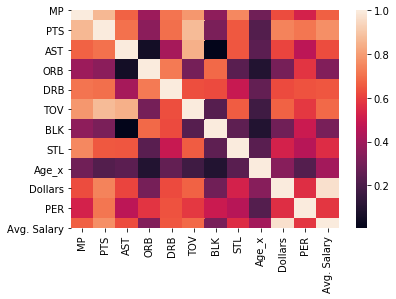

In [82]:
heat_stats= df_final[['Pos_x','MP','PTS','AST','ORB', 'DRB', 'TOV', 'BLK','STL','Age_x', 'Dollars','PER', 'Avg. Salary']]
df_data = heat_stats.corr() 
sns.heatmap(df_data)

Dollars and PER are not closely related as you would think they should. Dollars and PTS are closely related

[Text(0, 0.5, 'Average Turnovers Per Game'), Text(0.5, 0, 'Position')]

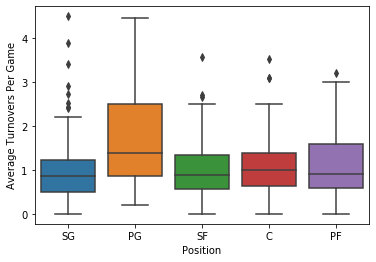

In [83]:
# Which Position is prone to turnovers
sns.boxplot(x="Pos_x", y="TOV", data=df_final).set(
    xlabel='Position', 
    ylabel='Average Turnovers Per Game')

Point guards are most likely to have more turnovers since they usually have the ball in thier hands most of the time

[Text(0, 0.5, 'Average Blocks Per Game'), Text(0.5, 0, 'Position')]

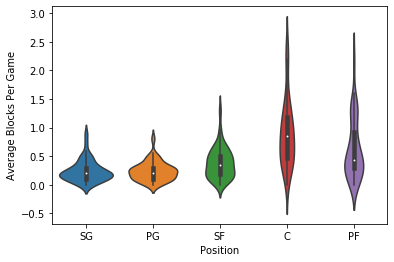

In [84]:
# What position has the most blocks
sns.violinplot(x="Pos_x", y="BLK", data=df_final).set(
    xlabel='Position', 
    ylabel='Average Blocks Per Game')

Big men (Centers and Power Forwards) are usually the ones defending the paint which is why you expect them to average more blocks a game.

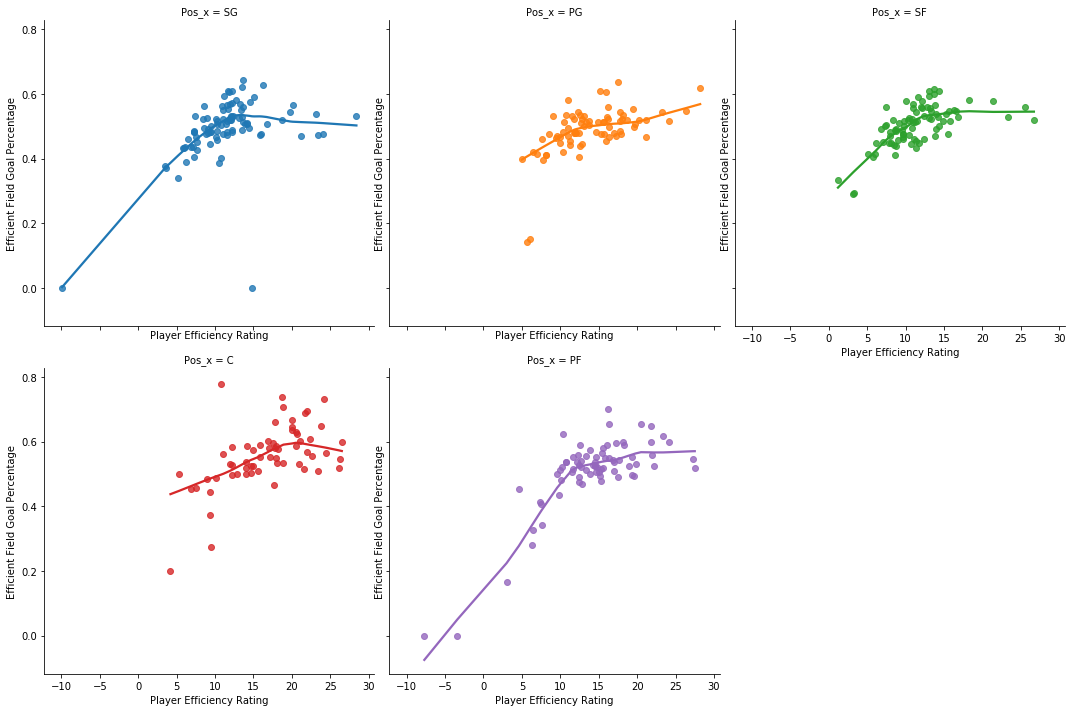

In [85]:
# Correlation of eFG% and PER
sns.lmplot(x="PER", y="eFG%",hue="Pos_x",col="Pos_x",col_wrap=3, 
           data=df_final,lowess=True).set(
    xlabel='Player Efficiency Rating', 
    ylabel='Efficient Field Goal Percentage')

Efficient scorers do not necessarily mean the player is more efficient due to that there is more to basketball than just scoring

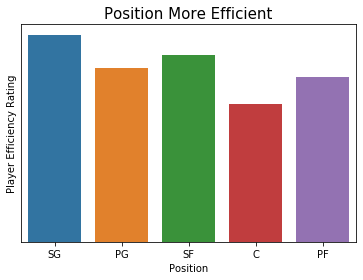

In [86]:
# Which position is more efficient
ax = sns.barplot(x="Pos_x", y="PER", data=df_final, 
                 estimator=lambda x: len(x) / len(df_final) * 100, orient='v')

ax.get_yaxis().set_ticks([])
ax.get_yaxis().set_ticklabels([])
plt.ylabel('Player Efficiency Rating')
_ = plt.xlabel('Position')
_ = plt.title('Position More Efficient', size=15)

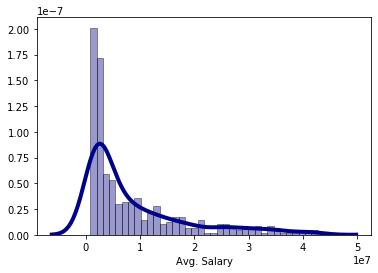

In [87]:
# Density Plot and Histogram of all players compensation
sns.distplot(df_final['Avg. Salary'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

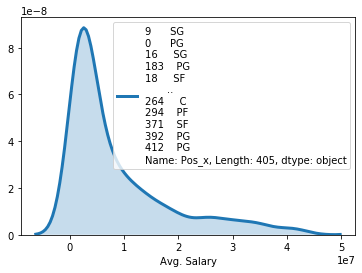

In [88]:
position = df_final['Pos_x']
sns.distplot(df_final['Avg. Salary'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = position)

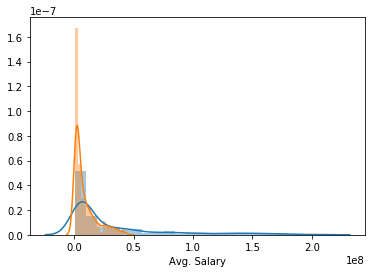

In [89]:
sns.distplot(df_final['Dollars'])
sns.distplot(df_final['Avg. Salary']);

This distribution chart shows the distribution of Dollars and Avg. Salary

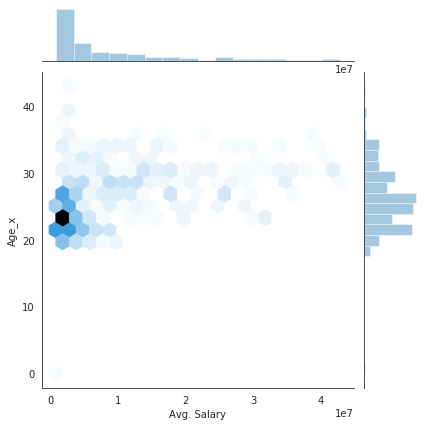

In [90]:
with sns.axes_style('white'):
    sns.jointplot("Avg. Salary", "Age_x", df_final, kind='hex')

This joint plot shows the relationship Avg. Salary and Age

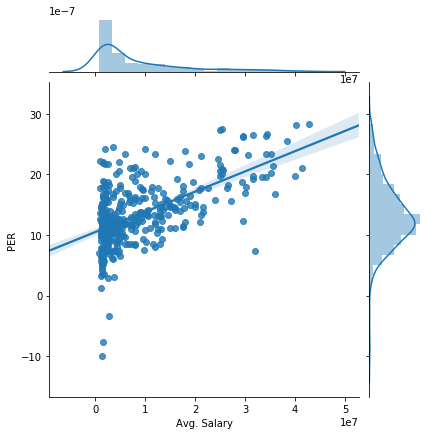

In [91]:
sns.jointplot("Avg. Salary", "PER", data=df_final, kind='reg');

This joint plot shows the positive relation between Avg. Salary and PER. 

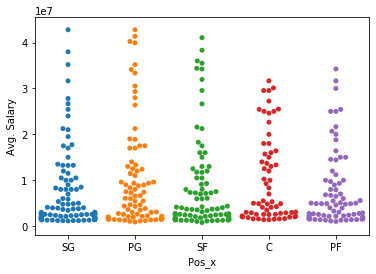

In [92]:
sns.swarmplot(x='Pos_x', y='Avg. Salary', data=df_final)

This swarmplot shows the Avg. Salary of players by position. The highest paid center is making around \\$30,000,000. Theres about 22 other players in different positions making more than that.

## Statistical Data Analysis

The purpose of this section is to answer the following questions...

1. Are there NBA players making less or more than average salary?
2. What's the correlation of NBA players' salary and age?

In [95]:
# Ranking top ten players in total dollar amount
df_final.sort_values(by='Dollars',ascending = False,inplace = True)
df_final[['Player','Dollars']].head(10)

,Player,Dollars
0,Russell Westbrook,206794070.0
1,Stephen Curry,201158790.0
3,Klay Thompson,189903600.0
4,Tobias Harris,180000000.0
5,Khris Middleton,177500000.0
6,Blake Griffin,171174820.0
9,James Harden,171131520.0
10,John Wall,171131520.0
13,Kevin Durant,164255700.0
14,Chris Paul,159730592.0


In [96]:
# Ranking top ten players in average salary
df_final.sort_values(by='Avg. Salary',ascending = False,inplace = True)
df_final[['Player','Avg. Salary']].head(10)

,Player,Avg. Salary
9,James Harden,42782880.0
10,John Wall,42782880.0
0,Russell Westbrook,41358814.0
13,Kevin Durant,41063925.0
1,Stephen Curry,40231758.0
14,Chris Paul,39932648.0
18,LeBron James,38328212.0
3,Klay Thompson,37980720.0
4,Tobias Harris,36000000.0
5,Khris Middleton,35500000.0


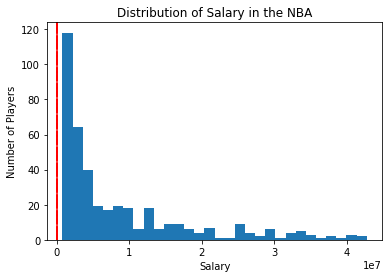

In [97]:
seed(47)
_ = plt.hist(df_final['Avg. Salary'], bins=30)
_ = plt.xlabel('Salary')
_ = plt.ylabel('Number of Players')
_ = plt.title('Distribution of Salary in the NBA')
_ = plt.axvline(172, color='r')
_ = plt.axvline(172+5, color='r', linestyle='--')
_ = plt.axvline(172-5, color='r', linestyle='--')
_ = plt.axvline(172+10, color='r', linestyle='-.')
_ = plt.axvline(172-10, color='r', linestyle='-.')

This graph shows the overall distribution of NBA Players salary. Majority of the players salary are under \\$10,000,000 average salary

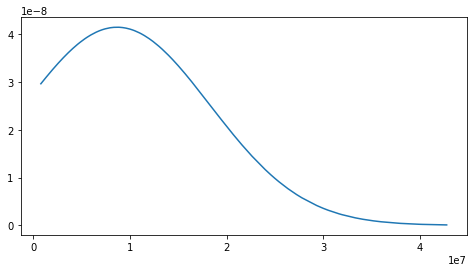

In [98]:
#Probability Density Function (PDF) Chart
x = df_final['Avg. Salary']

plt.figure(figsize=(8, 4))
plt.plot(x, st.norm.pdf(x, x.mean(), x.std()))
plt.show()

Probability density function(PDF) is used to determine the probability distribution for a Continuous Random Variable. Our variable is Average Salary (Avg. Salary). The area under the curve indicates the interval in which the Avg. Salary will fall.

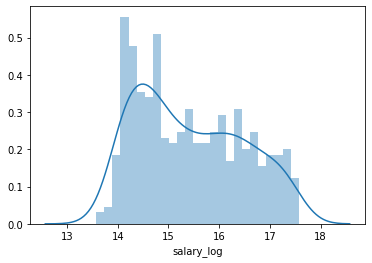

In [99]:
#Creating a column with the salary log to normalize the distribution
df_final['salary_log'] = np.log1p(df_final['Avg. Salary'])
sns.distplot(df_final['salary_log'], bins=25)

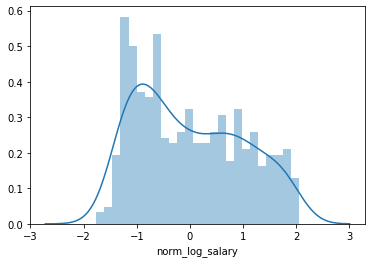

In [100]:
#Dividing by the mean and standard deviation to standardize the series in a new column
df_final['norm_log_salary'] = ((df_final['salary_log'] - df_final['salary_log'].mean()) / df_final['salary_log'].std())
sns.distplot(df_final['norm_log_salary'], bins=25)

### Mean and Standard Deviation

In [101]:
print(f"""Mean: {df_final.norm_log_salary.mean():.4f}
Standard Deviation: {df_final.norm_log_salary.std():.4f}""")

Mean: -0.0000
Standard Deviation: 1.0000


### P Value

In [102]:
norm_mean = df_final.norm_log_salary.mean()
norm_std = df_final.norm_log_salary.std()

p_value = st.norm(norm_mean, norm_std).sf(2*norm_std) * 2 #to sides
p_value

0.04550026389635674

A small p-value (typically ≤ 0.05) indicates strong evidence against the null hypothesis. we reject the null hypothesis.

### Calculating z score

In [103]:
z_score_inf = st.norm.interval(alpha=0.95, loc=norm_mean, scale=norm_std)[0]
z_score_sup = st.norm.interval(alpha=0.95, loc=norm_mean, scale=norm_std)[1]

print(f'{z_score_inf:.4f} <--------> {z_score_sup:.4f}')

-1.9600 <--------> 1.9600


A z-score (also called a standard score) gives you an idea of how far from the mean a data point is.

### Lower Than Average Salary

In [104]:
#Players
df_final_lower = df_final[df_final['norm_log_salary'] < z_score_inf]
df_final_lower

,Player,Pos_x,Team_x,Age_x,Yrs,Dollars,Guaranteed,% GTD,Avg. Salary,Free Agent,...,STL,BLK,TOV,PF,PTS,PER,Team_y,GS,salary_log,norm_log_salary


In [105]:
print(f"""Players with a lower salary than the average: 
Total - {df_final_lower.shape[0]}
Rate - {df_final_lower.shape[0] / df_final.shape[0] * 100:.2f}%""")

Players with a lower salary than the average: 
Total - 0
Rate - 0.00%


### Higher Than Average Salary

In [106]:
#Players
df_final_higher = df_final[df_final['norm_log_salary'] > z_score_sup]
df_final_higher

,Player,Pos_x,Team_x,Age_x,Yrs,Dollars,Guaranteed,% GTD,Avg. Salary,Free Agent,...,STL,BLK,TOV,PF,PTS,PER,Team_y,GS,salary_log,norm_log_salary
9,James Harden,SG,HOU,30.0,4.0,171131520.0,171131520.0,100.00,42782880.0,2023.0,...,1.700000,0.900000,4.500000,3.400000,34.400000,28.4,HOU,61.0,17.571649,2.047654
10,John Wall,PG,WAS,29.0,4.0,171131520.0,171131520.0,100.00,42782880.0,2023.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.571649,2.047654
0,Russell Westbrook,PG,HOUSigned w/OKC,31.0,5.0,206794070.0,206794070.0,100.00,41358814.0,2023.0,...,1.945205,0.452055,4.452055,3.356164,22.945205,21.1,NaN,NaN,17.537796,2.015385
13,Kevin Durant,SF,BKNSigned w/GSW,31.0,4.0,164255700.0,159955700.0,97.38,41063925.0,2023.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.530641,2.008564
1,Stephen Curry,PG,GSW,32.0,5.0,201158790.0,201158790.0,100.00,40231758.0,2022.0,...,1.568627,0.156863,3.000000,2.235294,26.392157,28.2,NaN,NaN,17.510167,1.989048
14,Chris Paul,PG,OKCSigned w/HOU,35.0,4.0,159730592.0,159730592.0,100.00,39932648.0,2022.0,...,1.965517,0.310345,2.620690,2.517241,15.620690,19.7,NaN,NaN,17.502705,1.981935


Curry is the only player with higher than average salary and is in the top 10 in PER.
None of these players are top ten in scoring.

In [107]:
print(f"""Players with a higher salary than the average: 
Total - {df_final_higher.shape[0]}
Rate - {df_final_higher.shape[0] / df_final.shape[0] * 100:.2f}%""")

Players with a higher salary than the average: 
Total - 6
Rate - 1.48%


In [108]:
#p-value and alpha max to the highest salary
p_value = st.norm(norm_mean, norm_std).sf(df_final['norm_log_salary'].max())
alpha = 1 - p_value
print(f'P-value: {p_value:.3f}\nAlpha Max: {alpha:.3f}\nWe can confirm that the highest salary is on the distribution!')

P-value: 0.020
Alpha Max: 0.980
We can confirm that the highest salary is on the distribution!


In [109]:
np.mean(df_final['Avg. Salary'])

8672969.575308641

data1: mean=8672969.575 stdv=9610307.369
data2: mean=26.007 stdv=4.405


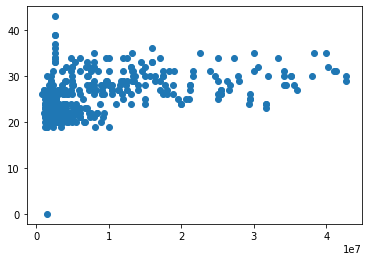

In [110]:
# Showing the correlation of Avg. Salary and Age
data1 = df_final['Avg. Salary']
data2 = df_final['Age_x']
# summarize
print('data1: mean=%.3f stdv=%.3f' % (np.mean(data1), np.std(data1)))
print('data2: mean=%.3f stdv=%.3f' % (np.mean(data2), np.std(data2)))
# plot
plt.scatter(data1, data2)
plt.show()

In [111]:
#cov(X, Y) = (sum (x - mean(X)) * (y - mean(Y)) ) * 1/(n-1)
np.cov(data1, data2)

array([[9.25866167e+13, 1.73078256e+07],
       [1.73078256e+07, 1.94479648e+01]])

In [112]:
corr, _ = st.pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.408


Pearsons shows a moderate correlation

In [113]:
corr, _ = st.spearmanr(data1, data2)
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: 0.503


Spearmans shows a moderate correlation as well

## 5. Modeling

### Processing Data

In [114]:
df_final.head()

,Player,Pos_x,Team_x,Age_x,Yrs,Dollars,Guaranteed,% GTD,Avg. Salary,Free Agent,...,STL,BLK,TOV,PF,PTS,PER,Team_y,GS,salary_log,norm_log_salary
9,James Harden,SG,HOU,30.0,4.0,171131520.0,171131520.0,100.00,42782880.0,2023.0,...,1.700000,0.900000,4.500000,3.400000,34.400000,28.4,HOU,61.0,17.571649,2.047654
10,John Wall,PG,WAS,29.0,4.0,171131520.0,171131520.0,100.00,42782880.0,2023.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.571649,2.047654
0,Russell Westbrook,PG,HOUSigned w/OKC,31.0,5.0,206794070.0,206794070.0,100.00,41358814.0,2023.0,...,1.945205,0.452055,4.452055,3.356164,22.945205,21.1,NaN,NaN,17.537796,2.015385
13,Kevin Durant,SF,BKNSigned w/GSW,31.0,4.0,164255700.0,159955700.0,97.38,41063925.0,2023.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.530641,2.008564
1,Stephen Curry,PG,GSW,32.0,5.0,201158790.0,201158790.0,100.00,40231758.0,2022.0,...,1.568627,0.156863,3.000000,2.235294,26.392157,28.2,NaN,NaN,17.510167,1.989048


In [115]:
df_final.columns

Index(['Player', 'Pos_x', 'Team_x', 'Age_x', 'Yrs', 'Dollars', 'Guaranteed',
       '% GTD', 'Avg. Salary', 'Free Agent', 'Year', 'Contract Ends', 'Pos_y',
       'Age_y', 'G', 'FG%', '3P%', '2P%', 'eFG%', 'FT%', 'MP', 'ORB', 'DRB',
       'FG', 'FGA', '3P', '3PA', '2P', '2PA', 'FT', 'FTA', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS', 'PER', 'Team_y', 'GS', 'salary_log',
       'norm_log_salary'],
      dtype='object')

In [116]:
#Drop Unnecessary Categorical columns. Also Dollars, Guaranteed, salary_log, and norm_log_salary to avoid Data Leakage
df_final = df_final.drop(columns=['Player', 'Pos_x', 'Team_x', 'Pos_y', 'Age_y', 'Team_y', 'Dollars', 'Guaranteed',
                                 'salary_log', 'norm_log_salary'])

#Rename Age column
df_final.rename(columns={'Age_x':'Age'}, inplace=True)

df_final.columns

Index(['Age', 'Yrs', '% GTD', 'Avg. Salary', 'Free Agent', 'Year',
       'Contract Ends', 'G', 'FG%', '3P%', '2P%', 'eFG%', 'FT%', 'MP', 'ORB',
       'DRB', 'FG', 'FGA', '3P', '3PA', '2P', '2PA', 'FT', 'FTA', 'TRB', 'AST',
       'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PER', 'GS'],
      dtype='object')

In [117]:
#Check to make sure all columns are numeric
df_final.dtypes

Age              float64
Yrs              float64
% GTD            float64
Avg. Salary      float64
Free Agent       float64
Year               int64
Contract Ends    float64
G                float64
FG%              float64
3P%              float64
2P%              float64
eFG%             float64
FT%              float64
MP               float64
ORB              float64
DRB              float64
FG               float64
FGA              float64
3P               float64
3PA              float64
2P               float64
2PA              float64
FT               float64
FTA              float64
TRB              float64
AST              float64
STL              float64
BLK              float64
TOV              float64
PF               float64
PTS              float64
PER              float64
GS               float64
dtype: object

In [118]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 405 entries, 9 to 453
Data columns (total 33 columns):
Age              405 non-null float64
Yrs              405 non-null float64
% GTD            405 non-null float64
Avg. Salary      405 non-null float64
Free Agent       405 non-null float64
Year             405 non-null int64
Contract Ends    405 non-null float64
G                391 non-null float64
FG%              391 non-null float64
3P%              391 non-null float64
2P%              391 non-null float64
eFG%             391 non-null float64
FT%              391 non-null float64
MP               391 non-null float64
ORB              391 non-null float64
DRB              391 non-null float64
FG               391 non-null float64
FGA              391 non-null float64
3P               391 non-null float64
3PA              391 non-null float64
2P               391 non-null float64
2PA              391 non-null float64
FT               391 non-null float64
FTA              391 no

In [119]:
X = df_final.drop('Avg. Salary', axis=1).values
y = df_final['Avg. Salary'].values

### Imputing missing data in a ML Pipeline

In [120]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.impute import SimpleImputer

# Setup the pipeline steps: steps
steps = [('imputation', SimpleImputer(missing_values=np.nan, strategy='mean')),
         ('scaler', StandardScaler()),
         ('rf', RandomForestRegressor())]

# Create the pipeline: pipeline 
pipeline = Pipeline(steps)

# Create train and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Hyperparameters GridSearchCV

In [121]:
param_grid = {
    'rf__n_estimators': [100, 200, 300, 1000],
    'rf__max_depth': [5, 8, 15, 25, 30],
    'rf__min_samples_split': [8, 10, 12],
    'rf__min_samples_leaf': [3, 4, 5] 
}


# Instantiate the grid search model
grid_search = GridSearchCV(estimator = pipeline, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 3)
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# best parameters
grid_search.best_params_

Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   53.5s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:  8.6min finished
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'rf__max_depth': 30,
 'rf__min_samples_leaf': 3,
 'rf__min_samples_split': 8,
 'rf__n_estimators': 200}

In [122]:
y_pred = grid_search.predict(X_test)

# RMSLE (Root Mean Squared Logarithmic Error) function
def rmsle(y_test, y_pred):
    return np.sqrt(metrics.mean_squared_log_error(y_test, y_pred))

# Create function to evaluate our model
def show_scores(model):
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    scores = {"Training MAE": metrics.mean_absolute_error(y_train, train_preds),
              "Valid MAE": metrics.mean_absolute_error(y_test, test_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_test, test_preds)}
    return scores

In [123]:
show_scores(grid_search)

{'Training MAE': 1613467.8116415255,
 'Valid MAE': 2903310.7079510908,
 'Training RMSLE': 0.3430420170412647,
 'Valid RMSLE': 0.5492906742599043}

The mean absolute percentage error (MAPE) is a statistical measure of how accurate a forecast system is. It measures this accuracy as a percentage.

In [124]:
# Function to evaluate model's MAPE
def evaluate(model, X_test, y_test):
    errors = abs(y_pred - y_test)
    mape = 100 * np.mean(errors / y_test)
    print('Model Performance')
    print('Mean Absolute Percentage Error = {:0.2f}%.'.format(mape))
    
    return mape

In [125]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)

Model Performance
Mean Absolute Percentage Error = 51.95%.


## Model Predictions

In [126]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,16400000.0,1.378073e+07
1,3717000.0,8.043600e+06
2,1270792.0,6.228440e+06
3,26361000.0,2.495171e+07
4,24604885.0,2.339081e+07
...,...,...
76,21666667.0,1.168062e+07
77,13221622.0,1.236920e+07
78,2687500.0,2.155395e+06
79,898310.0,1.991794e+06


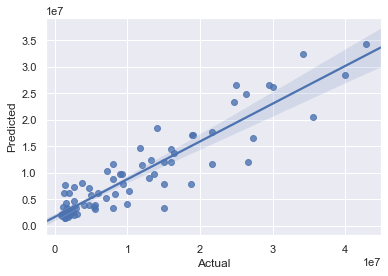

In [127]:
import seaborn as sns

sns.set(color_codes=True)
ax = sns.regplot(x="Actual", y="Predicted", data=df)

This linear line across the plot is the best available fit for the trend of the Predicted Average Salary (Avg. Salary) with respect to the Actual Avg. Salary. The data points far away from the line are the outliers.
Looking at this plot, we may say that if the actual average salary is around \\$20,000,000, then the predicted average salary is around $15,000,000.

## Feature Importance

Feature importance seeks to figure out which different attributes of the data were most important when it comes to predicting the target variable (Avg. Salary).

In [128]:
# Showing feature importance
model = grid_search.best_estimator_.named_steps['rf'].feature_importances_
model

array([0.06475642, 0.03763429, 0.00514137, 0.00470341, 0.00220885,
       0.06255938, 0.01544147, 0.0032763 , 0.00492764, 0.0094668 ,
       0.00673079, 0.00776602, 0.49535148, 0.0036782 , 0.00650966,
       0.01672674, 0.00561588, 0.00447454, 0.00389541, 0.00544142,
       0.00963925, 0.02543664, 0.059101  , 0.00428758, 0.01079947,
       0.00564898, 0.0048963 , 0.01266493, 0.00564897, 0.02303318,
       0.07014238, 0.00239525])

Feature: 0, Score: 0.06476
Feature: 1, Score: 0.03763
Feature: 2, Score: 0.00514
Feature: 3, Score: 0.00470
Feature: 4, Score: 0.00221
Feature: 5, Score: 0.06256
Feature: 6, Score: 0.01544
Feature: 7, Score: 0.00328
Feature: 8, Score: 0.00493
Feature: 9, Score: 0.00947
Feature: 10, Score: 0.00673
Feature: 11, Score: 0.00777
Feature: 12, Score: 0.49535
Feature: 13, Score: 0.00368
Feature: 14, Score: 0.00651
Feature: 15, Score: 0.01673
Feature: 16, Score: 0.00562
Feature: 17, Score: 0.00447
Feature: 18, Score: 0.00390
Feature: 19, Score: 0.00544
Feature: 20, Score: 0.00964
Feature: 21, Score: 0.02544
Feature: 22, Score: 0.05910
Feature: 23, Score: 0.00429
Feature: 24, Score: 0.01080
Feature: 25, Score: 0.00565
Feature: 26, Score: 0.00490
Feature: 27, Score: 0.01266
Feature: 28, Score: 0.00565
Feature: 29, Score: 0.02303
Feature: 30, Score: 0.07014
Feature: 31, Score: 0.00240


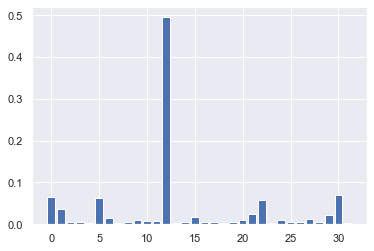

In [129]:
import matplotlib.pyplot as plt

# Display feature importance and display plot 
# Get importance
importance = model

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [130]:
zipped = list(zip(df_final.columns, model))

# Display features importance in descending order
df1 = pd.DataFrame(zipped, columns=['Features', 'Score']).sort_values('Score', ascending=False)
df1


,Features,Score
12,FT%,0.495351
30,PTS,0.070142
0,Age,0.064756
5,Year,0.062559
22,FT,0.059101
1,Yrs,0.037634
21,2PA,0.025437
29,PF,0.023033
15,DRB,0.016727
6,Contract Ends,0.015441


Free throw percentage (FT%) was the most important feature when it came to predicting Average Salary (Avg. Salary). Followed by points (PTS) and age (AGE).